### * For a machine learning problem, selection of Features took very important role.

* It not only reduces the complexity of the model, but gives better accuracy in some cases.

* Another important thing is that, we can easily understand which feature/features took important role to predict the target.

* For an example , in case of medical problem, we easily can understood which parameter(s)/feature(s) is to be veryfied  to diagonise the patient condition! However, other non-important parameter(s) can be ignored easily..

* Here, I have taken a popular datasets of Breast Cancer from sklearn library..

* There are many statistical method to understand the main features which will take important role in this context, but I will show few of them.

* Which method to choose is depends upon the characteristics of the datasets only..

####  *This popular Data sets having 30 features and one target variable. This is basically a binary classification problem..

* Lets load & look into the DataSets

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
feature = data['feature_names']
print("\nFeatures are :\n")
print(feature)
print(f'\nNo. of independent features are :{len(feature)}')


Features are :

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

No. of independent features are :30


In [6]:
print('Target Names :')
list(data['target_names'])

Target Names :


['malignant', 'benign']

* Importing some Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
x = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data.target
x.shape, y.shape

((569, 30), (569,))

In [10]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y.shape

(569,)

* This is a classification problem where, 0 denoting->Malignant and 1 denoting->Benign ,lets count?

In [12]:
#making dictionary ploting the target & checking whethere it is abnormal or not!
dict = {0:'Malignant',1:'Benign'}
y_num = pd.DataFrame(y,columns=['target'])
ynum = y_num['target'].map(dict)

* COUNTING THE TARGET VARIABLES

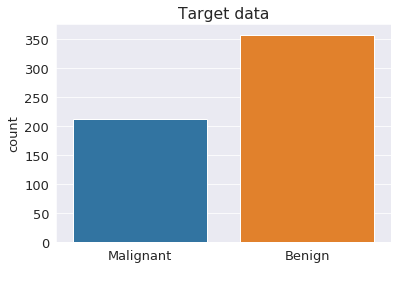

In [13]:
plt.rcParams['font.size'] =13
sns.set_style('darkgrid')
sns.countplot(ynum)
plt.xlabel(' ')
plt.title('Target data')
plt.show()

In [14]:
df = pd.concat([y_num,x],1)
df.isnull().sum().sum()

0

* There is no null values in the dataset

#### IMPORTING  LIBRARIES

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Taking four classifier as : 
#### 1) rfc = Random Forest  2) gbc = Gradient Boosting 3) dtr = Decision Tree  &  4) lgr = Logistic Regression

In [18]:
rfc = RandomForestClassifier(n_jobs=-1,random_state=0)
gbc = GradientBoostingClassifier()
dtr = DecisionTreeClassifier()
lgr = LogisticRegression(solver='liblinear')

#### Lets make a function that could run any classifier, predict the test dataset and will find the accuracy immediately

In [19]:
def modelTrain(clf,x,y,rs=0):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=rs,stratify=y)
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)
    accu = accuracy_score(ytest,pred)
    print(f'Features :{xtrain.shape[1]} | Accuracy :{round(accu*100,2)} %')

* Tuning the random state for the classifier, Decision Tree

In [24]:
for i in range(23):
    print(f'Random State:{i}')
    modelTrain(dtr,x,y,i) 

Random State:0
Features :30 | Accuracy :92.11 %
Random State:1
Features :30 | Accuracy :95.61 %
Random State:2
Features :30 | Accuracy :94.74 %
Random State:3
Features :30 | Accuracy :92.98 %
Random State:4
Features :30 | Accuracy :88.6 %
Random State:5
Features :30 | Accuracy :92.11 %
Random State:6
Features :30 | Accuracy :97.37 %
Random State:7
Features :30 | Accuracy :94.74 %
Random State:8
Features :30 | Accuracy :85.09 %
Random State:9
Features :30 | Accuracy :94.74 %
Random State:10
Features :30 | Accuracy :92.11 %
Random State:11
Features :30 | Accuracy :88.6 %
Random State:12
Features :30 | Accuracy :87.72 %
Random State:13
Features :30 | Accuracy :94.74 %
Random State:14
Features :30 | Accuracy :95.61 %
Random State:15
Features :30 | Accuracy :93.86 %
Random State:16
Features :30 | Accuracy :90.35 %
Random State:17
Features :30 | Accuracy :97.37 %
Random State:18
Features :30 | Accuracy :90.35 %
Random State:19
Features :30 | Accuracy :94.74 %
Random State:20
Features :30 | A

So, I will set the random state to 17 for maximum accuracy 97.37%

In [25]:
def modelTrain(clf,x,y,rs=17):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=rs,stratify=y)
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)
    accu = accuracy_score(ytest,pred)
    print(f'Features :{xtrain.shape[1]} | Accuracy :{round(accu*100,2)} %')

* applying to  Decision Tree Classifier with tuned random state

In [26]:
print('Decision Tree :')
modelTrain(dtr,x,y)

Decision Tree :
Features :30 | Accuracy :97.37 %


* applying to Gradient Boosting Ensembled method with tuned random state

In [27]:
print('Gradient Boosting :')
modelTrain(gbc,x,y)

Gradient Boosting :
Features :30 | Accuracy :97.37 %


* applying to  Random Forest Classifier with tuned random state

In [29]:
print('Random Forest :')
modelTrain(rfc,x,y)

Random Forest :
Features :30 | Accuracy :96.49 %


* applying to  Logistic regression Classifier with tuned random state

In [30]:
print('Logistic Regression :')
modelTrain(lgr,x,y)

Logistic Regression :
Features :30 | Accuracy :97.37 %


## Feature Selection:-

### 1.  Applying Pearson corelation, finding values of the coefficients and hence importances of the features

In [31]:
df = pd.concat([y_num,x],1)
df1 = df.corr().sort_values(by='target',ascending=False)
df2 = df1[['target']]
df2

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


Selecting some features having high corelations with target

In [32]:
df3 = df2[df2.target <= -0.6]
df3

,target
worst concavity,-0.659610
mean concavity,-0.696360
mean area,-0.708984
mean radius,-0.730029
worst area,-0.733825
mean perimeter,-0.742636
worst radius,-0.776454
mean concave points,-0.776614
worst perimeter,-0.782914
worst concave points,-0.793566


In [33]:
df3.index

Index(['worst concavity', 'mean concavity', 'mean area', 'mean radius',
       'worst area', 'mean perimeter', 'worst radius', 'mean concave points',
       'worst perimeter', 'worst concave points'],
      dtype='object')

In [34]:
lst = ['target'] + list(df3.index)
lst

['target',
 'worst concavity',
 'mean concavity',
 'mean area',
 'mean radius',
 'worst area',
 'mean perimeter',
 'worst radius',
 'mean concave points',
 'worst perimeter',
 'worst concave points']

* Here is the dataset with the above important features selecting from pearson corelation

In [35]:
df4 = df[lst]
df4.head()

,target,worst concavity,mean concavity,mean area,mean radius,worst area,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points
0,0,0.7119,0.3001,1001.0,17.99,2019.0,122.80,25.38,0.14710,184.60,0.2654
1,0,0.2416,0.0869,1326.0,20.57,1956.0,132.90,24.99,0.07017,158.80,0.1860
2,0,0.4504,0.1974,1203.0,19.69,1709.0,130.00,23.57,0.12790,152.50,0.2430
3,0,0.6869,0.2414,386.1,11.42,567.7,77.58,14.91,0.10520,98.87,0.2575
4,0,0.4000,0.1980,1297.0,20.29,1575.0,135.10,22.54,0.10430,152.20,0.1625


Co-relation of some important features with target


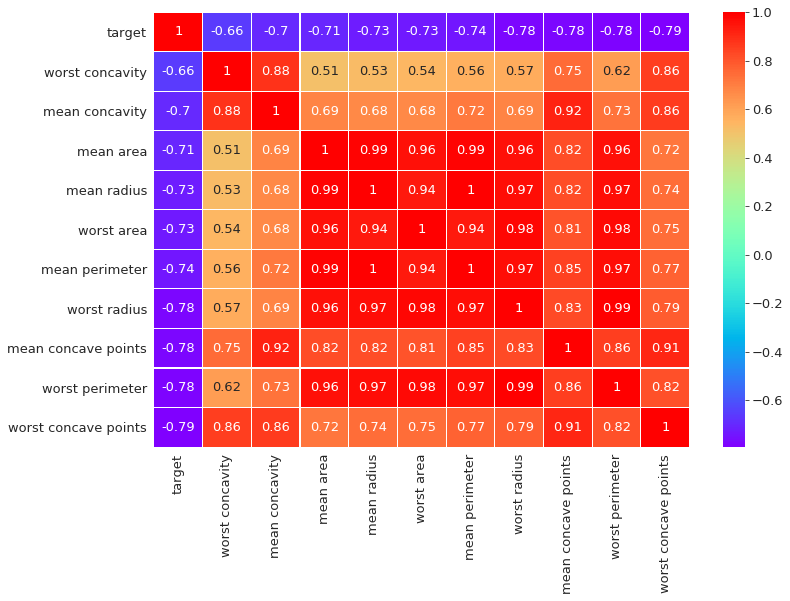

In [36]:
print('Co-relation of some important features with target')
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(),linewidths=0.1,annot =True,cmap='rainbow')
plt.show()

#### selected features from Pearson co-relation matrix

In [37]:
dfx = df4.drop('target',1)
dfx.head(2)

,worst concavity,mean concavity,mean area,mean radius,worst area,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points
0,0.7119,0.3001,1001.0,17.99,2019.0,122.8,25.38,0.14710,184.6,0.2654
1,0.2416,0.0869,1326.0,20.57,1956.0,132.9,24.99,0.07017,158.8,0.1860


#### Accurecy from selected Features with rfc & gbc

In [38]:
for i in range(23):
    print('Random State:',i)
    modelTrain(rfc,dfx,y,i)

Random State: 0
Features :10 | Accuracy :92.11 %
Random State: 1
Features :10 | Accuracy :95.61 %
Random State: 2
Features :10 | Accuracy :97.37 %
Random State: 3
Features :10 | Accuracy :95.61 %
Random State: 4
Features :10 | Accuracy :94.74 %
Random State: 5
Features :10 | Accuracy :96.49 %
Random State: 6
Features :10 | Accuracy :96.49 %
Random State: 7
Features :10 | Accuracy :94.74 %
Random State: 8
Features :10 | Accuracy :94.74 %
Random State: 9
Features :10 | Accuracy :96.49 %
Random State: 10
Features :10 | Accuracy :95.61 %
Random State: 11
Features :10 | Accuracy :93.86 %
Random State: 12
Features :10 | Accuracy :92.11 %
Random State: 13
Features :10 | Accuracy :94.74 %
Random State: 14
Features :10 | Accuracy :99.12 %
Random State: 15
Features :10 | Accuracy :92.98 %
Random State: 16
Features :10 | Accuracy :95.61 %
Random State: 17
Features :10 | Accuracy :93.86 %
Random State: 18
Features :10 | Accuracy :92.98 %
Random State: 19
Features :10 | Accuracy :97.37 %
Random Sta

In [39]:
modelTrain(rfc,dfx,y,14)

Features :10 | Accuracy :99.12 %


* after tuning random state I am getting much better result from selected features with Random Forest Classifier

* lets see with GBC classifier

In [40]:
for i in range(23):
    print('Random State:',i)
    modelTrain(gbc,dfx,y,i)

Random State: 0
Features :10 | Accuracy :93.86 %
Random State: 1
Features :10 | Accuracy :92.98 %
Random State: 2
Features :10 | Accuracy :96.49 %
Random State: 3
Features :10 | Accuracy :95.61 %
Random State: 4
Features :10 | Accuracy :96.49 %
Random State: 5
Features :10 | Accuracy :94.74 %
Random State: 6
Features :10 | Accuracy :97.37 %
Random State: 7
Features :10 | Accuracy :93.86 %
Random State: 8
Features :10 | Accuracy :92.98 %
Random State: 9
Features :10 | Accuracy :95.61 %
Random State: 10
Features :10 | Accuracy :92.98 %
Random State: 11
Features :10 | Accuracy :95.61 %
Random State: 12
Features :10 | Accuracy :92.98 %
Random State: 13
Features :10 | Accuracy :92.98 %
Random State: 14
Features :10 | Accuracy :96.49 %
Random State: 15
Features :10 | Accuracy :92.98 %
Random State: 16
Features :10 | Accuracy :92.11 %
Random State: 17
Features :10 | Accuracy :95.61 %
Random State: 18
Features :10 | Accuracy :92.98 %
Random State: 19
Features :10 | Accuracy :97.37 %
Random Sta

In [41]:
modelTrain(gbc,dfx,y,6)

Features :10 | Accuracy :97.37 %


### 2.  Removal of Constant and Quasi constant from all 30  features  if any
* This is also a type feature selection method by which we can remove costant features as well as quasi constant features if exists any..

In [43]:
from sklearn.feature_selection import VarianceThreshold

* Costant feature removal

In [44]:
def Const_remove(x):
    const = VarianceThreshold(threshold=0.01)
    const.fit(x)
    c = const.get_support()
    feature_important = x.columns[c]
    print("Reduced :",(len(x.columns)-len(feature_important)), 'columns')
    return x[feature_important]

In [45]:
xnow = Const_remove(x)

Reduced : 16 columns


In [46]:
xnow.shape

(569, 14)

**So, 16 features are removed

### 3.  Duplicate Removal if any
* In this method we can remove duplicate features if exists any..

In [47]:
def dupRemove(X):
    xt = X.T
    d = xt.duplicated()
    d1 = []
    for i in d:
        if i != True:
            d1.append(True)
    cln = X.columns[d1]
    print('Number of duplicade columns removed:',d.sum())
    return list(cln)   

In [48]:
feature1 = dupRemove(xnow)

Number of duplicade columns removed: 0


* No duplicate Feature is found so far..

* So, we have 14 features now as xnow..

In [51]:
print('After removing constant and quasi constant the selected features are:')
feature1

After removing constant and quasi constant the selected features are:


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst compactness',
 'worst concavity']

### 4.  RFE  with GBSelect feature selection Method

In [52]:
from sklearn.feature_selection import RFE

In [54]:
def RFE_GBSelect(clf,x,y,n=1):
    gbc = GradientBoostingClassifier()
    xtrain,xtest,ytrain,ytest = train_test_split(xnow,y,test_size=0.2,random_state=17,stratify=y)
    if n > 0:
           for i in range(1,n+1):
            select = RFE(gbc,i)
            select.fit(x,y)
            x_select_train = select.transform(xtrain)
            x_select_test = select.transform(xtest)
            clf.fit(x_select_train,ytrain)
            pred = clf.predict(x_select_test)
            accu = accuracy_score(ytest,pred)
            print(f'Features :{x_select_train.shape[1]} | Accuracy :{round(accu*100,2)} %')
    else :
        print('Value Error....')

#### Taking 14 features from xnow, and finding which feachures are the best and Important using Ranom Forest Classifier !

In [55]:
RFE_GBSelect(rfc,xnow,y,0)

Value Error....


In [56]:
RFE_GBSelect(rfc,xnow,y,14)

Features :1 | Accuracy :87.72 %
Features :2 | Accuracy :91.23 %
Features :3 | Accuracy :92.98 %
Features :4 | Accuracy :95.61 %
Features :5 | Accuracy :96.49 %
Features :6 | Accuracy :95.61 %
Features :7 | Accuracy :96.49 %
Features :8 | Accuracy :98.25 %
Features :9 | Accuracy :96.49 %
Features :10 | Accuracy :96.49 %
Features :11 | Accuracy :97.37 %
Features :12 | Accuracy :98.25 %
Features :13 | Accuracy :97.37 %
Features :14 | Accuracy :97.37 %


#### So, only 8 features are found best and Important where, Accuracy = 98.25% ( highest ) with Random Forest Classifier..

#### Lets see which are these 8 features ?

In [57]:
def model_selected(classifier,x,y,feature=1):
    gbc = GradientBoostingClassifier()
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=17,stratify=y)        
    select = RFE(gbc,feature)
    select.fit(x,y)
    x_select_train = select.transform(xtrain)
    x_select_test = select.transform(xtest)
    classifier.fit(x_select_train,ytrain)
    pred = classifier.predict(x_select_test)
    accu = accuracy_score(ytest,pred)
    print(f'Features :{x_select_train.shape[1]} | Accuracy :{round(accu*100,2)} %')
    s = select.get_support()
    imp = select.estimator_.feature_importances_
    df = pd.DataFrame({'Importances':list(imp)},index=x.columns[s])
    return list(x.columns[s]),df.sort_values(by='Importances',ascending=False)

In [58]:
feature2 , Imp = model_selected(rfc,xnow,y,feature=8)

Features :8 | Accuracy :98.25 %


In [60]:
print('Features are:\n\n',feature2)

Features are:

 ['mean texture', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity']


#### Lets see what are the Importancee or PDF to each of the feature

In [61]:
Imp

,Importances
worst radius,0.560842
worst perimeter,0.163898
worst concavity,0.072736
worst compactness,0.051334
worst texture,0.048688
worst area,0.046242
area error,0.028568
mean texture,0.027692


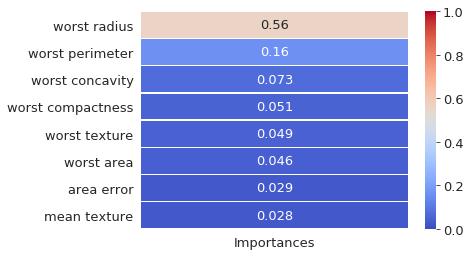

In [62]:
sns.heatmap(Imp,annot=True,vmin=0,vmax=1,linewidths=0.3,cmap='coolwarm')
plt.show()

#### Now using rfc, verify the Accuracy with random State 17!

In [63]:
Dfx = x[feature2]
Dfx.shape

(569, 8)

In [64]:
modelTrain(rfc,Dfx,y,17)

Features :8 | Accuracy :98.25 %


### Great!!

### 5.  Boruta Feature Selection (wrapper)  method

In [64]:
#!pip install boruta

In [65]:
def Boruta_selection(rfc,x,y,iter=10):
    from boruta import BorutaPy
    x1=np.array(x)
    sel = BorutaPy(rfc,random_state=42,max_iter=iter,perc=100,verbose=2)
    sel.fit(x1,y)
    c = sel.support_
    col = x.columns[c]
    return list(col) 

In [66]:
feature4  = Boruta_selection(rfc,x,y)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 10
Confirmed: 	23
Tentative: 	7
Rejected: 	0


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	23
Tentative: 	4
Rejected: 	0


#### After 10 iteration 23 confirmed features obtained as Important features out of 30! lets see , whitch are those ??

In [67]:
print(feature4)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [68]:
df4 = x[feature4]

In [69]:
df4.shape

(569, 23)

####  Now , Train the datasets with that 23 features  and finding the Accuracy.. 

In [70]:
modelTrain(rfc,df4,y,17)

Features :23 | Accuracy :98.25 %


* so, we are getting same result with 23 main features from boruta method

### 6. LASSO Feture Selection Method 
* This is one of most usefull feature selection method..

In [71]:
from sklearn.linear_model import Lasso

In [72]:
lasso = Lasso(alpha=0.5)

In [73]:
lasso.fit(x,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### From LASSO we will get the ultimate values of each of the coefficient..

In [74]:
lasso.coef_

array([-0.        , -0.        , -0.        ,  0.00015332, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.00062859, -0.01232936, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

* Important features having non-zero coefficient values

#### Selectet Important columns are:-

In [75]:
coeff_values = pd.DataFrame({'coeff':lasso.coef_},index=x.columns).sort_values(by='coeff')
c = (abs(coeff_values.coeff) > 0)
col_imp = list(x.columns[c])
col_imp

['mean radius', 'mean texture', 'worst fractal dimension']

### only Three Features are selected by this method !!

In [76]:
x_lasso = x[col_imp]
x_lasso.head()

,mean radius,mean texture,worst fractal dimension
0,17.99,10.38,0.11890
1,20.57,17.77,0.08902
2,19.69,21.25,0.08758
3,11.42,20.38,0.17300
4,20.29,14.34,0.07678


* Lets find the Accuracy

In [77]:
modelTrain(rfc,x_lasso,y,17)

Features :3 | Accuracy :99.12 %


#### *excellent! with only 3 features accuracy is maximum upto 99.12% ???

### Lets see the classification graph using Pairplot

In [78]:
las = pd.concat([x_lasso,ynum],1)
las.head(2)

,mean radius,mean texture,worst fractal dimension,target
0,17.99,10.38,0.11890,Malignant
1,20.57,17.77,0.08902,Malignant


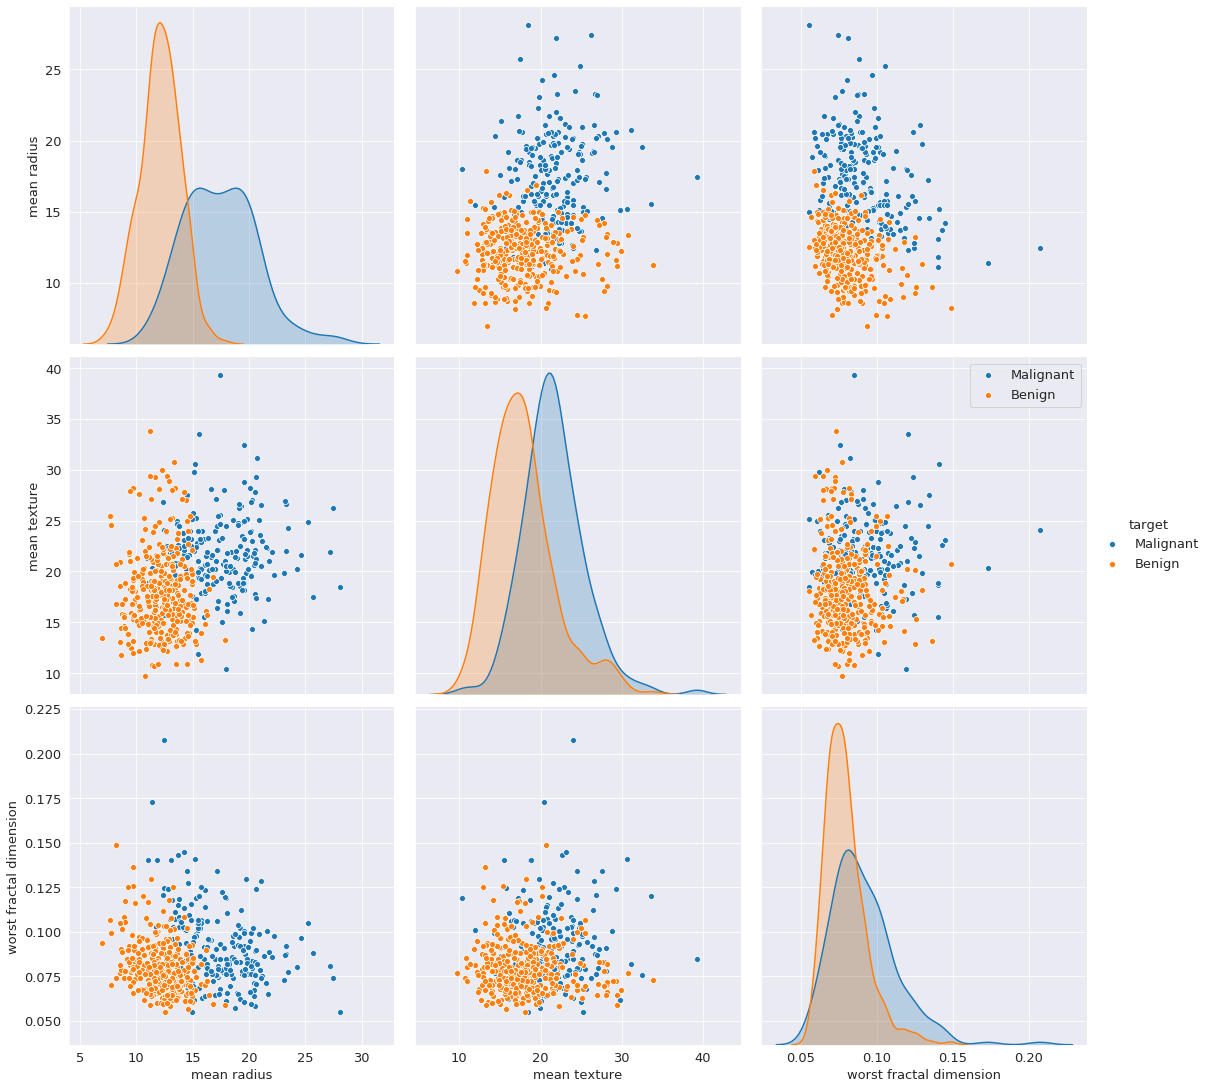

In [79]:
sns.pairplot(las,hue="target",height=5)
plt.legend()
plt.show()

### 7. Random Forest Classifier Selection Method(select from model)

In [80]:
from sklearn.feature_selection import SelectFromModel

In [81]:
sel = SelectFromModel(rfc)
sel.fit(x,y)
c = sel.get_support()


In [82]:
col_rf = list(x.columns[c])
print(col_rf)

['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [83]:
len(col_rf)

10

#### from this method 10 Important Features are selected. Lets find the Accuracy !

In [84]:
x_rf = x[col_rf]
x_rf.shape

(569, 10)

In [85]:
modelTrain(rfc,x_rf,y,19)

Features :10 | Accuracy :98.25 %


#### So, from 10 features and 19 random state we get maximum accuracy upto 98.25% 

### 8.  PCA  Method(Principal Component Analysis)

#### Well, with this method we will not select the important features but will shrink the features into lower number of components called Principal components, where all the components will be perpendicular in dimension to each other..

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Taken into 1 to 15 principal components  I must calculate accuracy for each sets

In [89]:
def comp(x,y,n=10):
    pca = PCA(n_components=n,random_state=15)
    scaler = StandardScaler()
    X = scaler.fit_transform(x)
    pca.fit(X,y)
    lst = []
    for i in range(1,n+1):
        lst.append('Comp_'+str(i))
    X_pca = pd.DataFrame(pca.transform(X),columns=lst)
    return modelTrain(rfc,X_pca,y),X_pca

In [90]:
for i in range(1,16):
    comp(x,y,i)

Features :1 | Accuracy :90.35 %
Features :2 | Accuracy :92.98 %
Features :3 | Accuracy :94.74 %
Features :4 | Accuracy :96.49 %
Features :5 | Accuracy :97.37 %
Features :6 | Accuracy :97.37 %
Features :7 | Accuracy :96.49 %
Features :8 | Accuracy :96.49 %
Features :9 | Accuracy :96.49 %
Features :10 | Accuracy :95.61 %
Features :11 | Accuracy :95.61 %
Features :12 | Accuracy :95.61 %
Features :13 | Accuracy :96.49 %
Features :14 | Accuracy :95.61 %
Features :15 | Accuracy :96.49 %


#### From PCA I can take minimum 5  main components, where accuracy came upto  97.37% ! 

##### Lets take 5 principal components and check which are these ??

In [91]:
_,df7 = comp(x,y,5)

Features :5 | Accuracy :97.37 %


In [92]:
df7.head()

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747


### 9.  Chi2 Feature Selection method
* This is also one of the best feature selection method

In [93]:
from sklearn.feature_selection import SelectKBest, chi2

In [94]:
def chi2_select(x,y):
    filt = SelectKBest(score_func=chi2,k='all')
    v = filt.fit(x,y)
    lst = list(v.scores_)
    return pd.DataFrame({'Coeff_imp':lst},index=x.columns).sort_values(by='Coeff_imp',ascending=False)   

In [95]:
chi = chi2_select(x,y)
chi

,Coeff_imp
worst area,112598.431564
mean area,53991.655924
area error,8758.504705
worst perimeter,3665.035416
mean perimeter,2011.102864
worst radius,491.689157
mean radius,266.104917
perimeter error,250.571896
worst texture,174.449400
mean texture,93.897508


#### Here also I am getting values of Importances of all 30 features..from there I can choose Important features by eleminating the lowest values of coefficients....

#### Lets choose lowest value to 100...

In [96]:
def Chi_coeff(value=100):
    return chi[chi.Coeff_imp > value]

In [97]:
Chi_coeff(value=100)

,Coeff_imp
worst area,112598.431564
mean area,53991.655924
area error,8758.504705
worst perimeter,3665.035416
mean perimeter,2011.102864
worst radius,491.689157
mean radius,266.104917
perimeter error,250.571896
worst texture,174.449400


In [98]:
features_chi = Chi_coeff(value=100).index
print('\nFeatures are:\n')
print(list(features_chi))


Features are:

['worst area', 'mean area', 'area error', 'worst perimeter', 'mean perimeter', 'worst radius', 'mean radius', 'perimeter error', 'worst texture']


#### I obtained 9 Important Features for values greater than 100 ...

In [99]:
Chix=x[features_chi]

In [102]:
modelTrain(rfc,Chix,y,6)   

Features :9 | Accuracy :97.37 %


#### So, Accuracy = 97.37% .

#### Now, taking 8 Important features from RFE method ... and analyse these features , whethere it can be improved more !

#### Now, visualize the distribution as wel as characteristics of the data sets...

In [103]:
del df

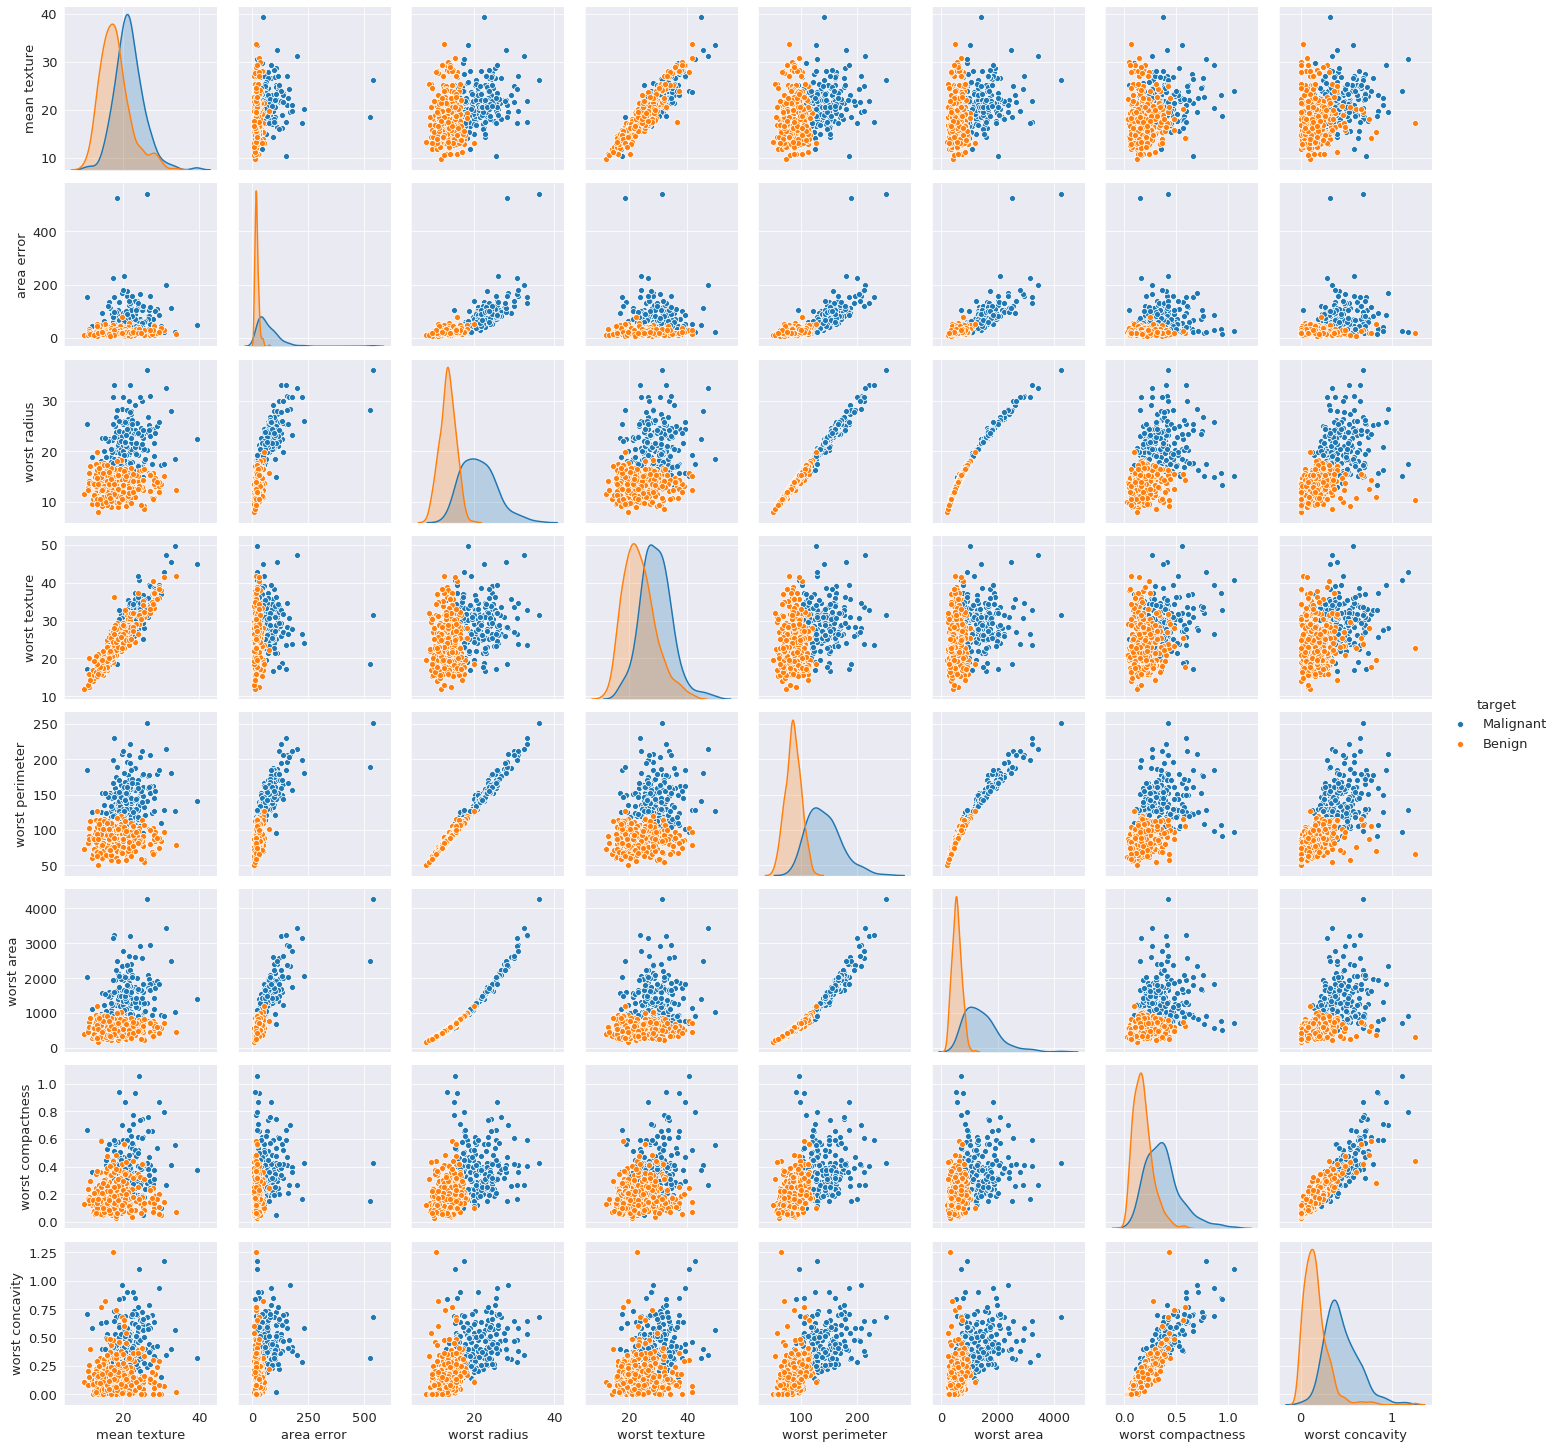

In [104]:
Dfx = x[feature2]

df = pd.concat([ynum,Dfx],1)

sns.pairplot(df,hue='target')
plt.show()

In [105]:
feature2

['mean texture',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst compactness',
 'worst concavity']

### Lets draw distribution plot and box plot to understand the characteristics of the above 8 features

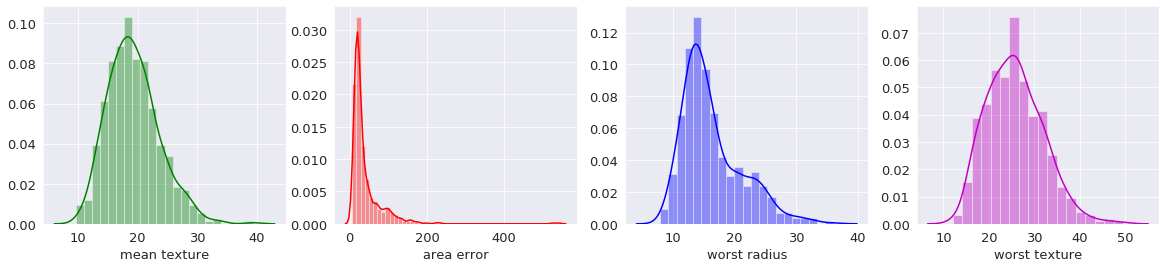

In [106]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4))
sns.distplot(Dfx['mean texture'],kde=True,color='g',ax=ax1,)
sns.distplot(Dfx['area error'],kde=True,color='r',ax=ax2)
sns.distplot(Dfx['worst radius'],kde=True,color='b',ax=ax3)
sns.distplot(Dfx['worst texture'],kde=True,color='m',ax=ax4)
plt.show()

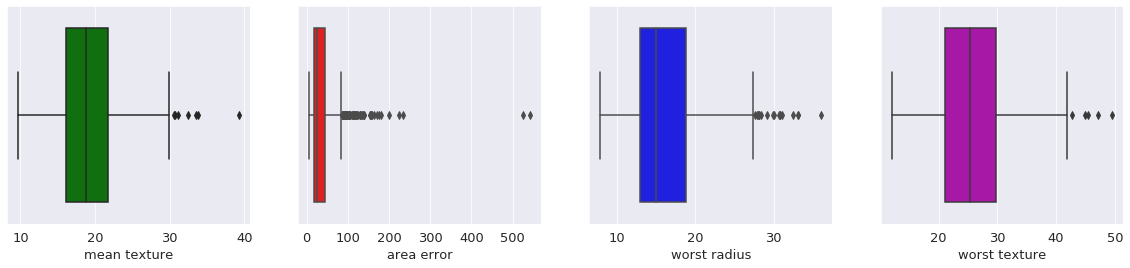

In [107]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4))
sns.boxplot(Dfx['mean texture'],color='g',ax=ax1)
sns.boxplot(Dfx['area error'],color='r',ax=ax2)
sns.boxplot(Dfx['worst radius'],color='b',ax=ax3)
sns.boxplot(Dfx['worst texture'],color='m',ax=ax4)
plt.show()

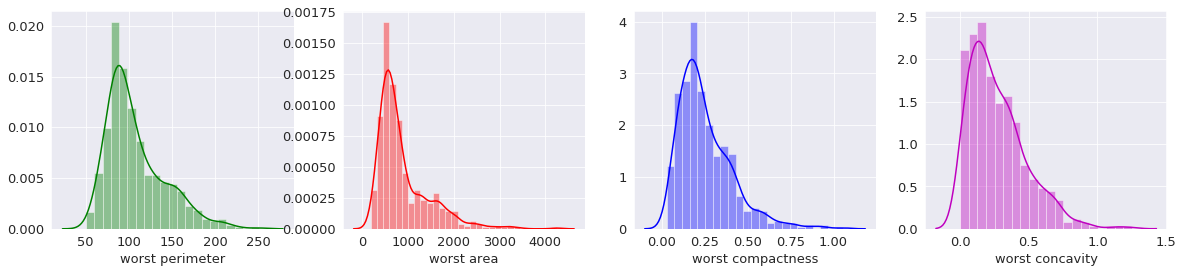

In [108]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4))
sns.distplot(Dfx['worst perimeter'],kde=True,color='g',ax=ax1)
sns.distplot(Dfx['worst area'],kde=True,color='r',ax=ax2)
sns.distplot(Dfx['worst compactness'],kde=True,color='b',ax=ax3)
sns.distplot(Dfx['worst concavity'],kde=True,color='m',ax=ax4)
plt.show()

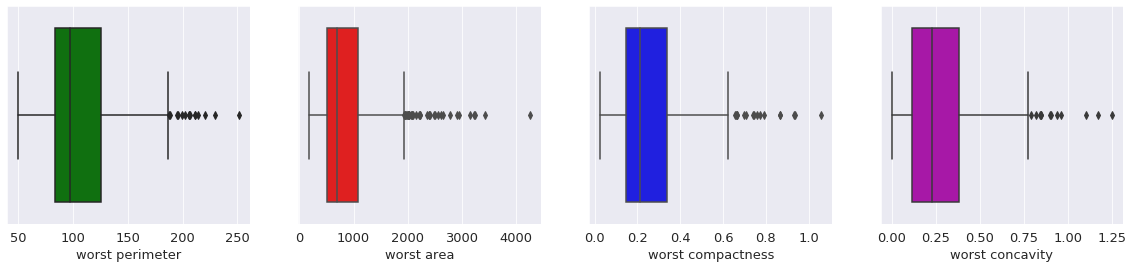

In [109]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4))
sns.boxplot(Dfx['worst perimeter'],color='g',ax=ax1)
sns.boxplot(Dfx['worst area'],color='r',ax=ax2)
sns.boxplot(Dfx['worst compactness'],color='b',ax=ax3)
sns.boxplot(Dfx['worst concavity'],color='m',ax=ax4)
plt.show()

In [110]:
Df = pd.concat([ynum,Dfx],1).copy()

In [111]:
Df['target'] = Df['target'].map({'Malignant':0,'Benign':1})

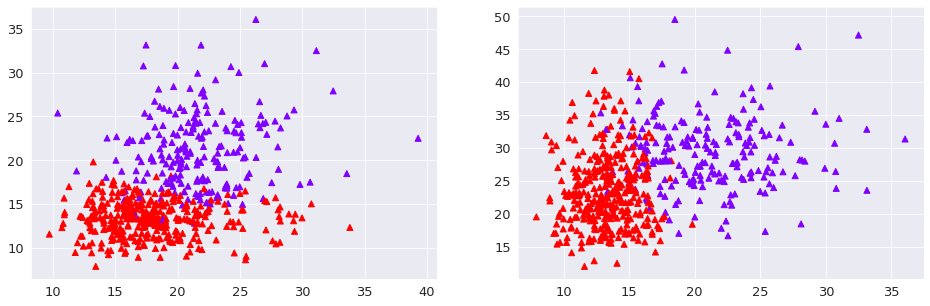

In [112]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.scatter(Df["mean texture"],Df["worst radius"],c=Df.target,cmap='rainbow',marker='^')
ax2.scatter(Df["worst radius"],Df["worst texture"],c=Df.target,cmap='rainbow',marker='^')
plt.show()

In [113]:
modelTrain(rfc,Dfx,y,17)

Features :8 | Accuracy :98.25 %


*Lets take the Important features obtained from Lasso 

In [114]:
x2 = x[col_imp]
x2.head()

,mean radius,mean texture,worst fractal dimension
0,17.99,10.38,0.11890
1,20.57,17.77,0.08902
2,19.69,21.25,0.08758
3,11.42,20.38,0.17300
4,20.29,14.34,0.07678


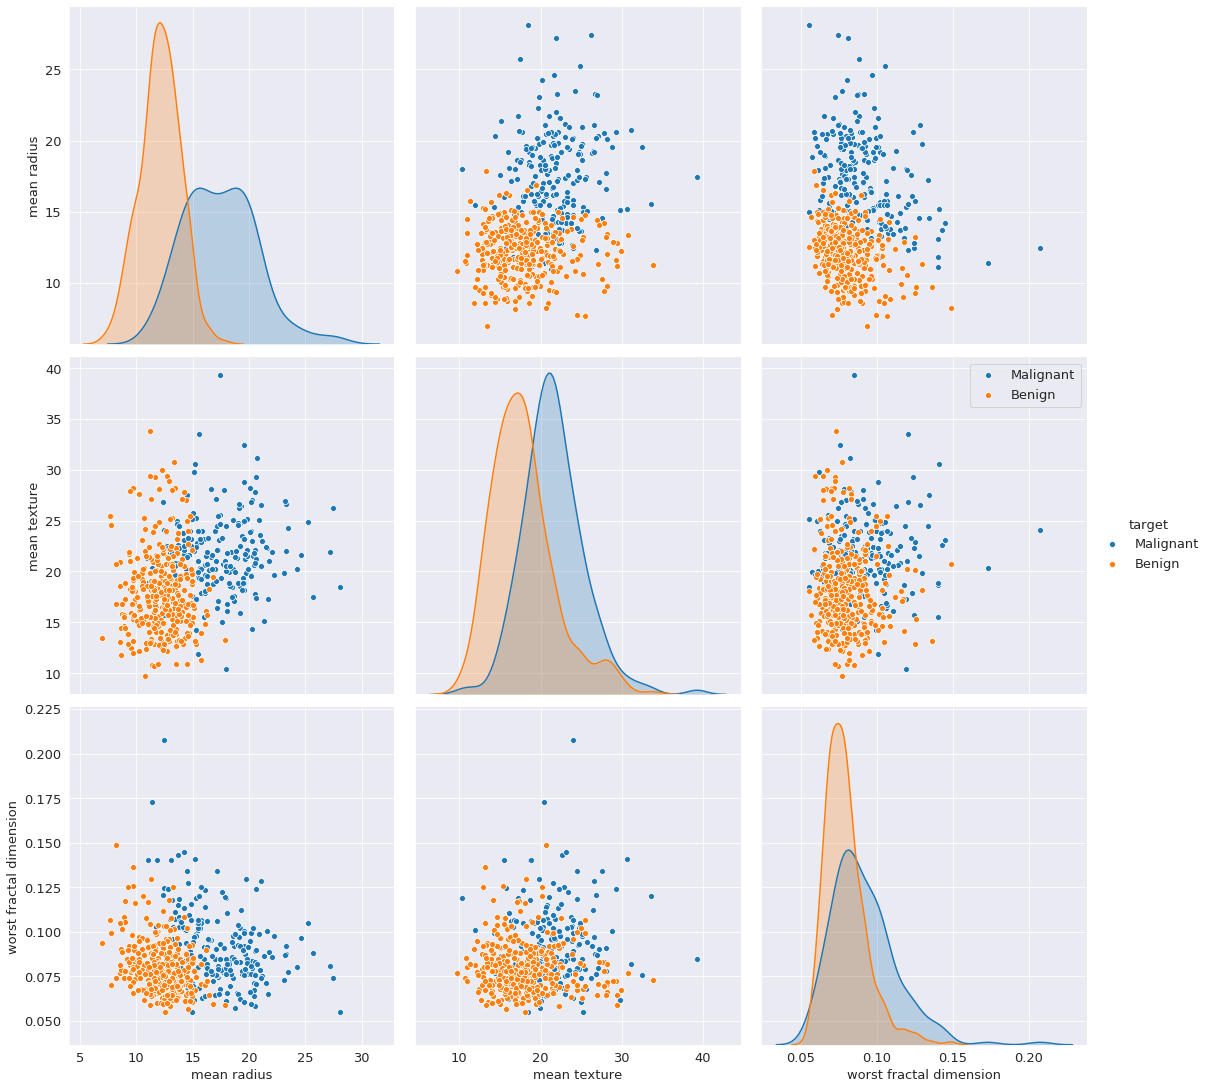

In [115]:
df8 = pd.concat([x2,df['target']],1)
sns.pairplot(df8,hue='target',height=5)
plt.legend()
plt.show()

In [116]:
print('\nFeatures obtained from Lasso:\n')chose
col_imp # obtained from lasso


Features obtained from Lasso:



['mean radius', 'mean texture', 'worst fractal dimension']

In [117]:
modelTrain(rfc,x[col_imp],y,17)

Features :3 | Accuracy :99.12 %


* This is the accurecy from three Important features found from Lasso method, even with uncleaned datasets!

* So, we can say that out of all above method, lasso is best performer for this datasets.

* Lets find f1-score and confussion matrix

Features :3 | Accuracy for test data:98.25 %

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

****************************************************************************************************
Features :3 | Accuracy for train data:100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

****************************************************************************************************


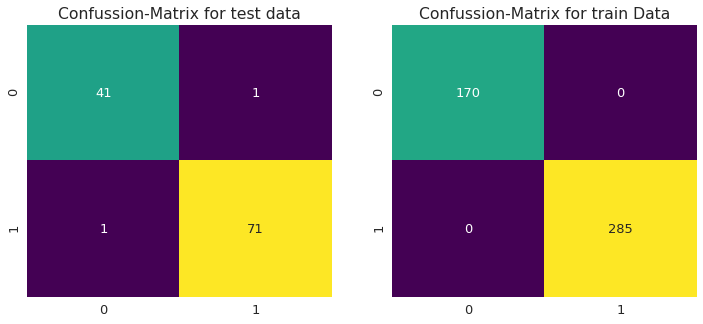

In [118]:
xtrain,xtest,ytrain,ytest = train_test_split(x[col_imp],y,test_size=0.2,random_state=17,stratify=y)
rfc = RandomForestClassifier(n_estimators=100,random_state=17)
rfc.fit(xtrain,ytrain)

pred = rfc.predict(xtest)
accu = accuracy_score(ytest,pred)
con = confusion_matrix(ytest,pred)
cr = classification_report(ytest,pred)

preda = rfc.predict(xtrain)
accur = accuracy_score(ytrain,preda)
conr = confusion_matrix(ytrain,preda)
crr = classification_report(ytrain,preda)
print(f'Features :{xtrain.shape[1]} | Accuracy for test data:{round(accu*100,2)} %\n')
print(cr)
print('*'*100)
print(f'Features :{xtrain.shape[1]} | Accuracy for train data:{round(accur*100,2)} %\n')
print(crr)
print('*'*100)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(con,annot=True,cbar=False,cmap='viridis',ax=ax1)
ax1.set_title('Confussion-Matrix for test data')
sns.heatmap(conr,annot=True,fmt='0.3g',cbar=False,cmap='viridis',ax=ax2)
ax2.set_title('Confussion-Matrix for train Data')
plt.show()

### conclussion:-

* we can choose other classifier like xgboost

* we can make cross validation as well as hyperperameter tunning for outmost performance

* we also can remove outliers for better model.

In [119]:
print('Thanks..')

Thanks..
